In [8]:
import sklearn 
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
titanic_data=pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
x=titanic_data.drop(['PassengerId','Survived','Cabin','Name','Ticket'], axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [12]:
x=pd.get_dummies(x)
x=x.fillna({'Age': x.Age.median()})
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [13]:
y=titanic_data['Survived']

In [14]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [15]:
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [18]:
clf.score(X_test,y_test)

0.9966101694915255

In [212]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [215]:
clf.score(X_test,y_test)

0.8203389830508474

In [214]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [221]:
max_depth_values=range(1,100)
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score=clf.score(X_train,y_train)
    test_score=clf.score(X_test,y_test)
    mean_cross_val=cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score=pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score],'test_score':[test_score],'cross_val_score':[mean_cross_val]})
    scores_data=scores_data.append(temp_score)

In [220]:
scores_data=pd.DataFrame()

In [222]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.795261


In [223]:
scores_data_long=scores_data.melt(id_vars=['max_depth'], value_vars=['train_score', 'test_score','cross_val_score'], var_name='set_type', value_name='score')

In [224]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.778537
293,96,cross_val_score,0.776828
294,97,cross_val_score,0.765063
295,98,cross_val_score,0.771814


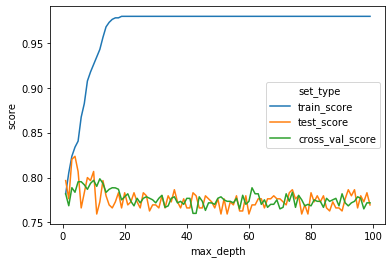

In [225]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [28]:
from sklearn.model_selection import cross_val_score

In [227]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [228]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [229]:
clf=tree.DecisionTreeClassifier()

In [230]:
parametrs={'criterion':['gini','entropy'], 'max_depth':range(1,30)}

In [5]:
from sklearn.model_selection import GridSearchCV

In [232]:
GridSearchCV_clf=GridSearchCV(clf, parametrs, cv=5)

In [246]:
GridSearchCV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [247]:
GridSearchCV_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [1]:
best_clf=GridSearchCV_clf.best_estimator_

NameError: name 'GridSearchCV_clf' is not defined

In [250]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [257]:
from sklearn.metrics import precision_score, recall_score
y_pred=best_clf.predict(X_test)

In [258]:
precision_score(y_test, best_clf.predict(X_test))

0.7962962962962963

In [259]:
recall_score(y_test, best_clf.predict(X_test))

0.7166666666666667

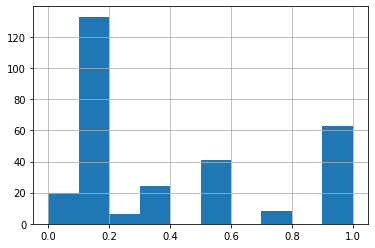

In [262]:
y_predicted_prob=best_clf.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

In [264]:
y_pred=np.where(y_predicted_prob[:, 1]>0.8,1,0)

In [265]:
precision_score(y_test, y_pred)

0.9206349206349206

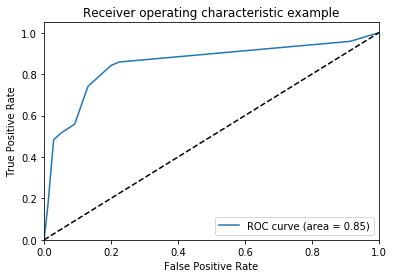

In [267]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [17]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100,min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
clf_rf=RandomForestClassifier()
parametrs={'n_estimators':[10,20,30],'max_depth': [2,5,7,10]}

In [21]:
grid_searc_cv_clf=GridSearchCV(clf_rf, parametrs, cv=5)

In [22]:
grid_searc_cv_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [33]:
best_clf=grid_searc_cv_clf.best_estimator_

In [34]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [36]:
feature_importances=best_clf.feature_importances_

In [37]:
feature_importances_df=pd.DataFrame({'feature':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
5,Sex_female,0.279495
4,Fare,0.193563
6,Sex_male,0.137492
1,Age,0.134910
0,Pclass,0.113469
2,SibSp,0.038261
3,Parch,0.037280
7,Embarked_C,0.030333
9,Embarked_S,0.023493
8,Embarked_Q,0.011705
